## Employee Promotion Analysis

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_csv("employee_promotion.csv")

<IPython.core.display.Javascript object>

In [4]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


<IPython.core.display.Javascript object>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


<IPython.core.display.Javascript object>

In [6]:
features = data.iloc[:, :-1]
target = data.iloc[:, -1:]

<IPython.core.display.Javascript object>

In [7]:
features.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0


<IPython.core.display.Javascript object>

In [8]:
target.head()

,is_promoted
0,0
1,0
2,0
3,0
4,0


<IPython.core.display.Javascript object>

### Categorical Columns Analysis

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

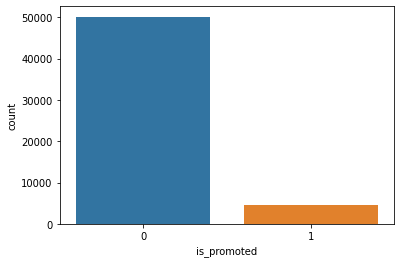

<IPython.core.display.Javascript object>

In [9]:
sns.countplot(x="is_promoted", data=data)

### Observation:
* We have very less no of employees who has promoted.

<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

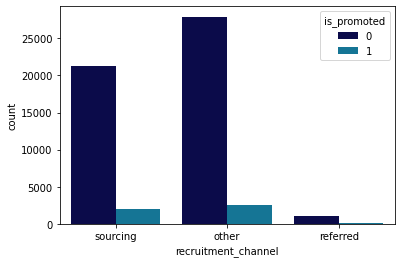

<IPython.core.display.Javascript object>

In [10]:
sns.countplot(x="recruitment_channel", data=data, hue="is_promoted", palette="ocean")

### Observation
* As you can see referred categories have not that much values so it is not useful.

<AxesSubplot:xlabel='department', ylabel='count'>

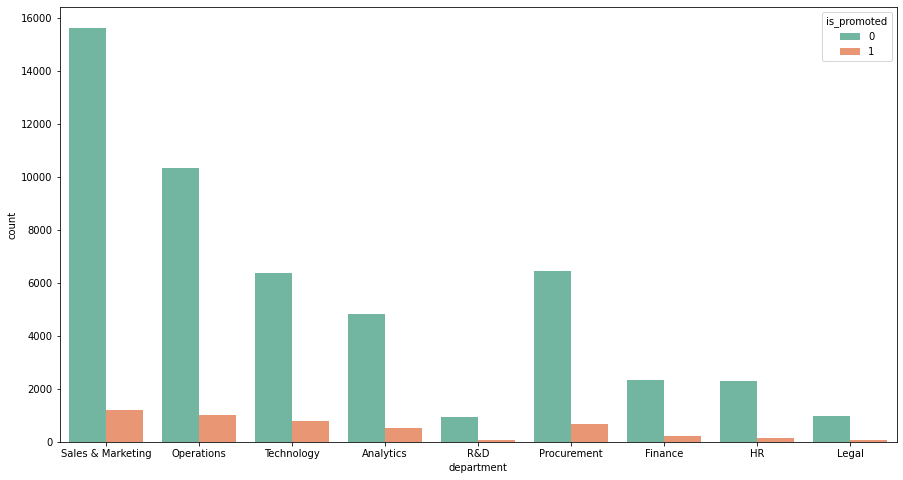

<IPython.core.display.Javascript object>

In [11]:
plt.figure(figsize=(15, 8))
sns.countplot(x="department", data=data, hue="is_promoted", palette="Set2")

### Observation:
* Highest No of Emplyoees is in sales and marketing department.
* Analytics department employee has high chance they might get prmomoted.

<AxesSubplot:xlabel='region', ylabel='count'>

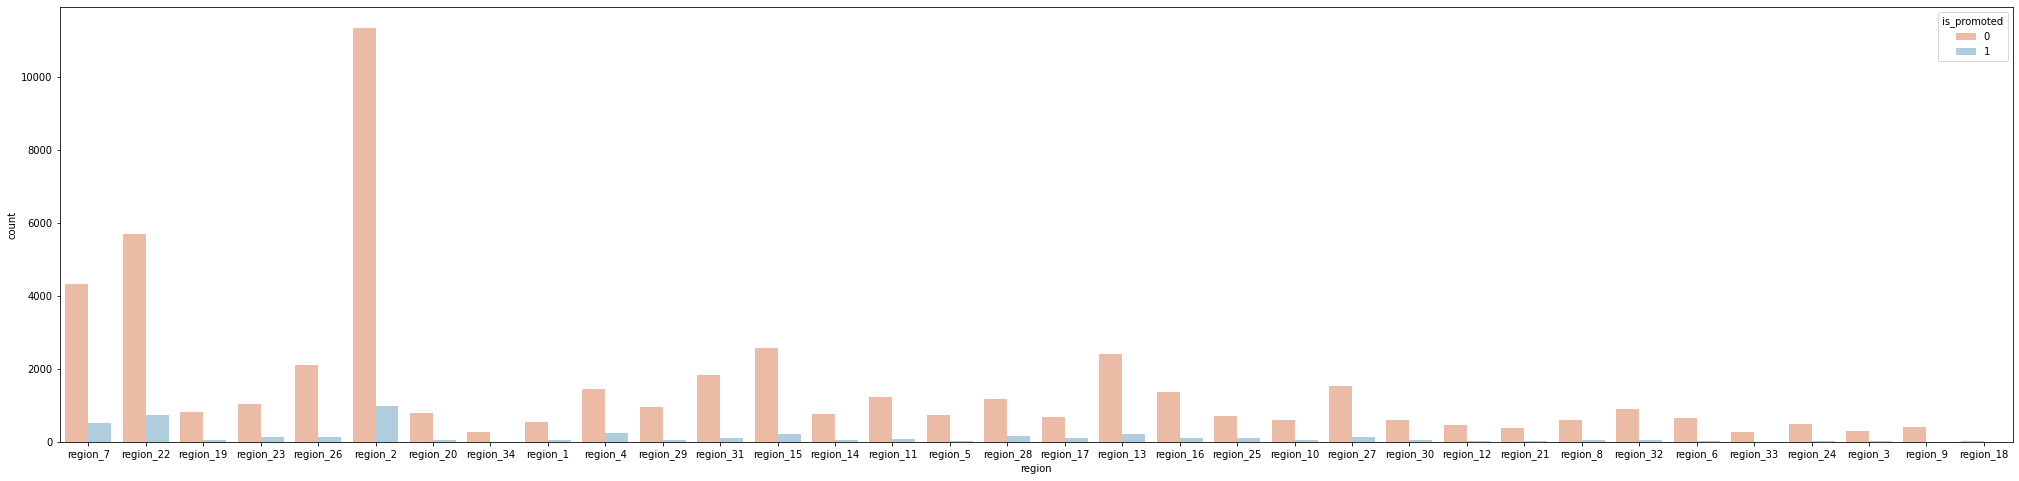

<IPython.core.display.Javascript object>

In [12]:
plt.figure(figsize=(35, 8))
sns.countplot(x="region", data=data, hue="is_promoted", palette="RdBu")

### Observation:
* Most of employees coming from region_7,22 and 2 compare to others.
* Region_2 has highest number of employees.

<AxesSubplot:xlabel='education', ylabel='count'>

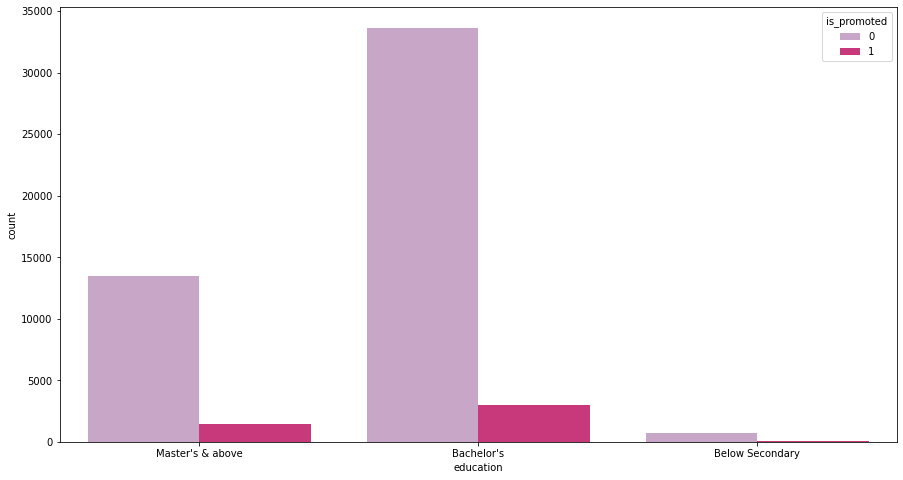

<IPython.core.display.Javascript object>

In [13]:
plt.figure(figsize=(15, 8))
sns.countplot(x="education", data=data, hue="is_promoted", palette="PuRd")

### Observation:
* We can remove below secondary education employee because it will not affected the final model.

<AxesSubplot:xlabel='gender', ylabel='count'>

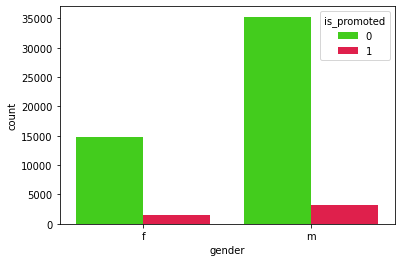

<IPython.core.display.Javascript object>

In [14]:
sns.countplot(x="gender", data=data, hue="is_promoted", palette="prism")

### Ratio Male and Female Promotion

In [15]:
def promot_gender_finder(gender, is_promoted):
    return len(
        data.loc[(data["gender"] == gender) & (data["is_promoted"] == is_promoted)]
    )


female_promoted = promot_gender_finder("f", 1)
female_not_promoted = promot_gender_finder("f", 0)

male_promoted = promot_gender_finder("m", 1)
male_not_promoted = promot_gender_finder("m", 0)

<IPython.core.display.Javascript object>

In [16]:
promot_ratio_female = female_promoted / (female_not_promoted + female_promoted)
promot_ratio_male = male_promoted / (male_promoted + male_not_promoted)

<IPython.core.display.Javascript object>

In [17]:
promot_ratio_male * 100, promot_ratio_female * 100

(8.315149625935161, 8.993379107405591)

<IPython.core.display.Javascript object>

### Numerical Columns Analysis

<AxesSubplot:xlabel='is_promoted', ylabel='no_of_trainings'>

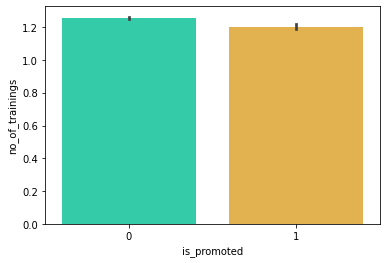

<IPython.core.display.Javascript object>

In [18]:
sns.barplot(x="is_promoted", y="no_of_trainings", data=data, palette="turbo")

### Observation:
* No Of Trainings feature will not much affect the promotion of employee.

<AxesSubplot:xlabel='is_promoted', ylabel='age'>

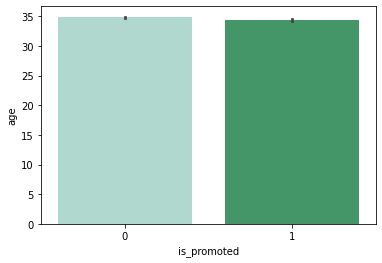

<IPython.core.display.Javascript object>

In [19]:
sns.barplot(x="is_promoted", y="age", data=data, palette="BuGn")

### Observation:
* Age Feature Doesn't affect Employee Promotion.

<AxesSubplot:xlabel='is_promoted', ylabel='previous_year_rating'>

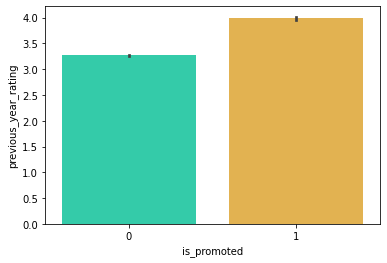

<IPython.core.display.Javascript object>

In [20]:
sns.barplot(x="is_promoted", y="previous_year_rating", data=data, palette="turbo")

### Observation:
* Previous Year Rating is an Important feature for employee promotion.

<AxesSubplot:xlabel='is_promoted', ylabel='length_of_service'>

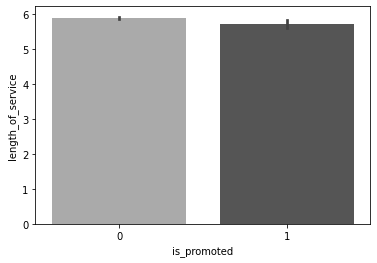

<IPython.core.display.Javascript object>

In [21]:
sns.barplot(x="is_promoted", y="length_of_service", data=data, palette="binary")

### Observation:
* Length of Service Feature Doesn't affect Employee Promotion.

<AxesSubplot:xlabel='is_promoted', ylabel='awards_won'>

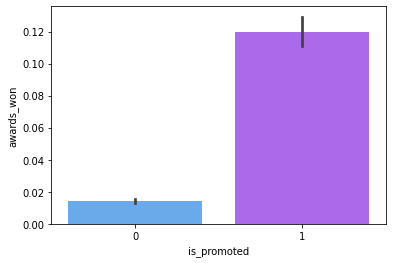

<IPython.core.display.Javascript object>

In [22]:
sns.barplot(x="is_promoted", y="awards_won", data=data, palette="cool")

### Observation:
* Awards Won is an Important feature for employee promotion.

<AxesSubplot:xlabel='is_promoted', ylabel='avg_training_score'>

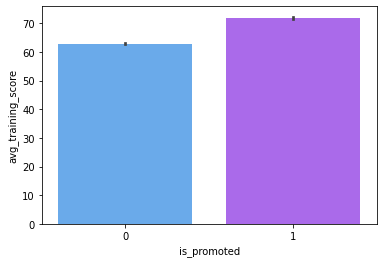

<IPython.core.display.Javascript object>

In [23]:
sns.barplot(x="is_promoted", y="avg_training_score", data=data, palette="cool")

### Observation:
* Average training score might be useful feature for employee promotion.

### Final Notes From Data Visualization:-
* In Recruitment_channel feature we will convert referred category to other_recruitment_channel.
* No of trainings, Length of Service and age is not that much important feature.

## Feature Selection

In [24]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

<IPython.core.display.Javascript object>

In [25]:
features.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0


<IPython.core.display.Javascript object>

In [26]:
features = features.iloc[:, 1:]

<IPython.core.display.Javascript object>

In [27]:
le = LabelEncoder()
columns = ["department", "region", "education", "gender", "recruitment_channel"]
encoded_features = features.copy()
for column_name in columns:
    encoded_features.loc[:, column_name] = le.fit_transform(
        encoded_features.loc[:, column_name]
    )

<IPython.core.display.Javascript object>

In [28]:
imputer = SimpleImputer()
encoded_features = imputer.fit_transform(encoded_features)

<IPython.core.display.Javascript object>

### Information Gain

In [29]:
importances = mutual_info_classif(encoded_features, target.values.ravel())

<IPython.core.display.Javascript object>

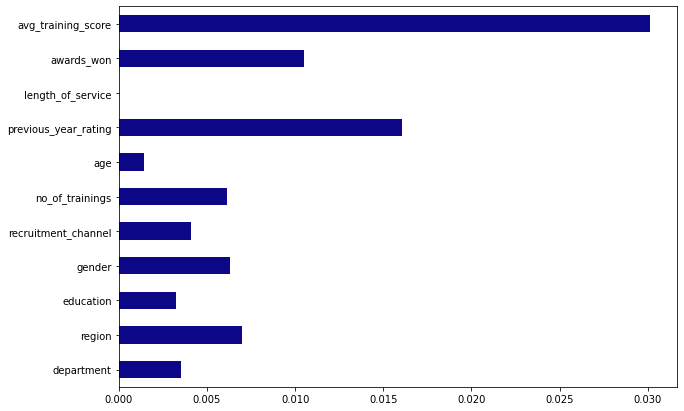

<IPython.core.display.Javascript object>

In [30]:
feat_importance = pd.Series(importances, features.columns)
plt.figure(figsize=(10, 7))
feat_importance.plot(kind="barh", colormap="plasma")
plt.show()

### Observation:
* We can remove age and length_of_service feature for now.

### Chi-Square Test

In [31]:
from sklearn.feature_selection import SelectKBest, chi2

<IPython.core.display.Javascript object>

In [32]:
chi2_features = SelectKBest(chi2, k=8)
x_kbest_features = chi2_features.fit_transform(encoded_features, target)

<IPython.core.display.Javascript object>

In [33]:
x_kbest_features.shape

(54808, 8)

<IPython.core.display.Javascript object>

In [34]:
encoded_features.shape

(54808, 11)

<IPython.core.display.Javascript object>

**Feature Selection Methods** [Link](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/)

### Variance Threshold

In [35]:
from sklearn.feature_selection import VarianceThreshold

<IPython.core.display.Javascript object>

In [36]:
v_threshold = VarianceThreshold(threshold=0.3)
v_threshold.fit(encoded_features)
for column_name, support in zip(features.columns, v_threshold.get_support()):
    print(f"{column_name}: {support}")

# false : don't consider
# true : consider

department: True
region: True
education: True
gender: False
recruitment_channel: True
no_of_trainings: True
age: True
previous_year_rating: True
length_of_service: True
awards_won: False
avg_training_score: True


<IPython.core.display.Javascript object>

### Mean Absolute Difference

In [37]:
# mean_abs_diff = np.sum(np.abs(X - np.mean(X, axis = 0)), axis = 0)/ X.shape[0]

<IPython.core.display.Javascript object>

### Machine Learning Models

In [38]:
# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# train test split
from sklearn.model_selection import train_test_split

# evalution
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score

# warnings
import warnings

warnings.filterwarnings("ignore")
from multicolumnlabelencoder import MultiColumnLabelEncoder

<IPython.core.display.Javascript object>

In [39]:
cols = list(data.columns)
[cols.remove(x) for x in ["length_of_service", "age", "employee_id"]]
needed_data = data.loc[:, cols]

<IPython.core.display.Javascript object>

In [41]:
columns = ["department", "region", "education", "gender", "recruitment_channel"]
needed_data = MultiColumnLabelEncoder(columns=columns).fit_transform(needed_data)

<IPython.core.display.Javascript object>

In [42]:
imputer = SimpleImputer()
needed_data = imputer.fit_transform(needed_data)

<IPython.core.display.Javascript object>

In [43]:
features = needed_data[:, :-1]
target = needed_data[:, -1:]

<IPython.core.display.Javascript object>

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=0
)

<IPython.core.display.Javascript object>

In [45]:
len(X_train), len(X_test)

(43846, 10962)

<IPython.core.display.Javascript object>

In [46]:
def get_all_statistics(model, train, test):
    model = model.fit(train[0], train[1])
    print("Train:\n")
    print(classification_report(train[1], model.predict(train[0])))
    print("Test:\n")
    print(classification_report(test[1], model.predict(test[0])))
    print("Cross Validation for 10 Folds:\n")
    cv = KFold(n_splits=10, random_state=0, shuffle=True)
    scores = cross_val_score(model, features, target, cv=cv, n_jobs=-1)
    print(f"Accuracy of Cross Validation For 10 Folds : {np.mean(scores):.3f}")
    return model

<IPython.core.display.Javascript object>

In [47]:
train = (X_train, y_train.ravel())
test = (X_test, y_test.ravel())

<IPython.core.display.Javascript object>

In [48]:
lr = get_all_statistics(LogisticRegression(), train, test)

Train:

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     40099
         1.0       0.55      0.10      0.17      3747

    accuracy                           0.92     43846
   macro avg       0.74      0.55      0.56     43846
weighted avg       0.89      0.92      0.89     43846

Test:

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     10041
         1.0       0.57      0.12      0.20       921

    accuracy                           0.92     10962
   macro avg       0.75      0.56      0.58     10962
weighted avg       0.89      0.92      0.89     10962

Cross Validation for 10 Folds:

Accuracy of Cross Validation For 10 Folds : 0.916


<IPython.core.display.Javascript object>

In [49]:
knn = get_all_statistics(KNeighborsClassifier(n_neighbors=3), train, test)

Train:

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     40099
         1.0       0.85      0.38      0.52      3747

    accuracy                           0.94     43846
   macro avg       0.90      0.69      0.75     43846
weighted avg       0.94      0.94      0.93     43846

Test:

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96     10041
         1.0       0.56      0.25      0.34       921

    accuracy                           0.92     10962
   macro avg       0.75      0.61      0.65     10962
weighted avg       0.90      0.92      0.91     10962

Cross Validation for 10 Folds:

Accuracy of Cross Validation For 10 Folds : 0.920


<IPython.core.display.Javascript object>

In [50]:
naive_bayes = get_all_statistics(GaussianNB(), train, test)

Train:

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     40099
         1.0       0.44      0.11      0.18      3747

    accuracy                           0.91     43846
   macro avg       0.68      0.55      0.57     43846
weighted avg       0.88      0.91      0.89     43846

Test:

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     10041
         1.0       0.45      0.14      0.21       921

    accuracy                           0.91     10962
   macro avg       0.69      0.56      0.58     10962
weighted avg       0.89      0.91      0.89     10962

Cross Validation for 10 Folds:

Accuracy of Cross Validation For 10 Folds : 0.912


<IPython.core.display.Javascript object>

In [51]:
svc = get_all_statistics(SVC(), train, test)

Train:

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96     40099
         1.0       0.00      0.00      0.00      3747

    accuracy                           0.91     43846
   macro avg       0.46      0.50      0.48     43846
weighted avg       0.84      0.91      0.87     43846

Test:

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     10041
         1.0       0.00      0.00      0.00       921

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962

Cross Validation for 10 Folds:

Accuracy of Cross Validation For 10 Folds : 0.915


<IPython.core.display.Javascript object>

In [52]:
dt = get_all_statistics(DecisionTreeClassifier(), train, test)

Train:

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     40099
         1.0       0.99      0.72      0.83      3747

    accuracy                           0.98     43846
   macro avg       0.98      0.86      0.91     43846
weighted avg       0.98      0.98      0.97     43846

Test:

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     10041
         1.0       0.42      0.36      0.39       921

    accuracy                           0.90     10962
   macro avg       0.68      0.66      0.67     10962
weighted avg       0.90      0.90      0.90     10962

Cross Validation for 10 Folds:

Accuracy of Cross Validation For 10 Folds : 0.908


<IPython.core.display.Javascript object>

In [53]:
rf = get_all_statistics(RandomForestClassifier(n_estimators=4), train, test)

Train:

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     40099
         1.0       0.89      0.61      0.72      3747

    accuracy                           0.96     43846
   macro avg       0.93      0.80      0.85     43846
weighted avg       0.96      0.96      0.96     43846

Test:

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     10041
         1.0       0.54      0.29      0.38       921

    accuracy                           0.92     10962
   macro avg       0.74      0.63      0.67     10962
weighted avg       0.90      0.92      0.91     10962

Cross Validation for 10 Folds:

Accuracy of Cross Validation For 10 Folds : 0.919


<IPython.core.display.Javascript object>

As you can seee Random Forest Classifier Works best.
* Training Percentage : 97% 
* Test Percentage : 93%
* Cross Validation Percentage for 10 Folds : 92.72%

In [54]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1397856674),
 DecisionTreeClassifier(max_features='auto', random_state=793111312),
 DecisionTreeClassifier(max_features='auto', random_state=1014534957),
 DecisionTreeClassifier(max_features='auto', random_state=667623456)]

<IPython.core.display.Javascript object>

In [55]:
rf.n_features_

9

<IPython.core.display.Javascript object>

In [56]:
rf.feature_importances_

array([0.12416602, 0.21334022, 0.03224737, 0.03479416, 0.04085597,
       0.02833911, 0.07016627, 0.03055146, 0.42553941])

<IPython.core.display.Javascript object>

In [57]:
data.shape

(54808, 13)

<IPython.core.display.Javascript object>

In [58]:
for column_name, importance in zip(
    data.drop(
        ["length_of_service", "age", "is_promoted", "employee_id"], axis=1
    ).columns,
    rf.feature_importances_,
):
    print(f"{column_name} = {importance}")

department = 0.12416602137182539
region = 0.21334022091909705
education = 0.032247369988295534
gender = 0.03479416434356078
recruitment_channel = 0.040855967019268094
no_of_trainings = 0.02833910704205484
previous_year_rating = 0.07016627480553583
awards_won = 0.03055146063513989
avg_training_score = 0.4255394138752226


<IPython.core.display.Javascript object>

*****

### Make Pipeline

MultiColumnLabelEncoder [Link](https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn)

In [93]:
from multicolumnlabelencoder import MultiColumnLabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

<IPython.core.display.Javascript object>

In [94]:
data.columns.tolist()

['employee_id',
 'department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won',
 'avg_training_score',
 'is_promoted']

<IPython.core.display.Javascript object>

Pipeline using Sklearn : [Link](https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/)

In [121]:
pre_process = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        (
            "drop_columns",
            "drop",
            [
                "employee_id",
                "age",
                "length_of_service",
            ],
        ),
    ],
)

<IPython.core.display.Javascript object>

In [124]:
columns = ["department", "region", "education", "gender", "recruitment_channel"]

employee_promotion_pipeline = Pipeline(
    steps=[
        ("encoding", MultiColumnLabelEncoder(columns=columns)),
        ("pre_process", pre_process),
        ("impute_missing_columns", SimpleImputer(strategy="mean")),
        ("Random Forest", RandomForestClassifier(n_estimators=4)),
    ]
)

<IPython.core.display.Javascript object>

In [125]:
features = data.drop(columns=["is_promoted"])
target = data["is_promoted"]

<IPython.core.display.Javascript object>

In [126]:
employee_promotion_pipeline.fit(features, target)

Pipeline(steps=[('encoding',
                 <multicolumnlabelencoder.MultiColumnLabelEncoder object at 0x7f3087484b20>),
                ('pre_process',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['employee_id', 'age',
                                                   'length_of_service'])])),
                ('impute_missing_columns', SimpleImputer()),
                ('Random Forest', RandomForestClassifier(n_estimators=4))])

<IPython.core.display.Javascript object>

In [129]:
print(classification_report(target, employee_promotion_pipeline.predict(features)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     50140
           1       0.89      0.61      0.73      4668

    accuracy                           0.96     54808
   macro avg       0.93      0.80      0.85     54808
weighted avg       0.96      0.96      0.96     54808



<IPython.core.display.Javascript object>

Save the Pipeline [Link](https://www.mikulskibartosz.name/how-to-save-a-machine-learning-model-into-a-file/)

In [130]:
# Save the Pipeline

toBePersisted = dict(
    {
        "model": employee_promotion_pipeline,
        "metadata": {
            "name": "Employee Promotion?",
            "author": "Manthan Bhikadiya",
            "date": "2022-01-24",
            "metrics": {"accuracy": 0.96},
        },
    }
)

<IPython.core.display.Javascript object>

In [131]:
from joblib import dump

dump(toBePersisted, "model.joblib",)

['model.joblib']

<IPython.core.display.Javascript object>

In [133]:
# loading pipeline

from joblib import load

model = load("model.joblib")
model

{'model': Pipeline(steps=[('encoding',
                  <multicolumnlabelencoder.MultiColumnLabelEncoder object at 0x7f30bdd35820>),
                 ('pre_process',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('drop_columns', 'drop',
                                                   ['employee_id', 'age',
                                                    'length_of_service'])])),
                 ('impute_missing_columns', SimpleImputer()),
                 ('Random Forest', RandomForestClassifier(n_estimators=4))]),
 'metadata': {'name': 'Employee Promotion?',
  'author': 'Manthan Bhikadiya',
  'date': '2022-01-24',
  'metrics': {'accuracy': 0.96}}}

<IPython.core.display.Javascript object>